# 0. Evan Varan, lze4

# 1. Imports

In [22]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import Bunch
import matplotlib.pyplot as plt

# 2. Load mnist dataset

In [23]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X_mnist = mnist.data
y_mnist = mnist.target

# 3. Print the first five rows of the dataset

In [24]:
mnist_df = pd.DataFrame(mnist.data, columns=mnist.feature_names)
mnist_df['target'] = mnist.target 

print(mnist_df.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel782  pixel783  pixel784  target  
0         0         

# 4. Print the last five rows of the dataset

In [25]:
print(mnist_df.tail())

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  \
69995        0  ...         0         0         0         0         0   
69996        0  ...         0         0         0         0         0   
69997        0  ...         0         0         0         0         0   
69998        0  ...         0         0         0         0         0   
69999        0  ...         0         0         0         0         0   

       pixel781  pixel782  pixel783  pixel784  target  
69995         0   

# 5. Create a text box and mention about the number of features and number of samples in the dataset

In [26]:
num_samples, num_features = mnist_df.shape
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

Number of samples: 70000
Number of features: 785


# 6. Find out how many unique classes are in the dataset

In [27]:
unique_classes = mnist_df['target'].unique()
num_classes = len(unique_classes)

print(f"Unique Classes: {unique_classes}")
print(f"Categories ({num_classes}, object): {sorted(unique_classes)}")
print(f"Number of Classes: {num_classes}")

Unique Classes: ['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
Categories (10, object): ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Number of Classes: 10


# 7. Print the first image of the dataset

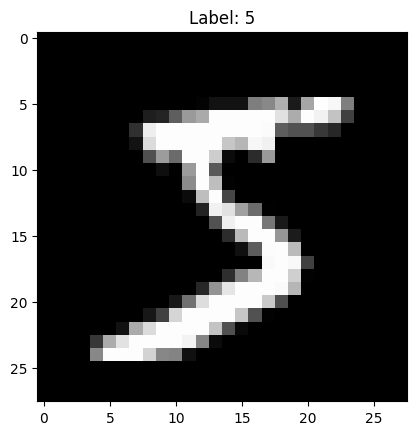

In [28]:
first_image = mnist.data.iloc[0].values.reshape(28, 28)

plt.imshow(first_image, cmap='gray')
plt.title(f"Label: {mnist.target.iloc[0]}")
plt.show()

# 8. Print the first five images from the dataset

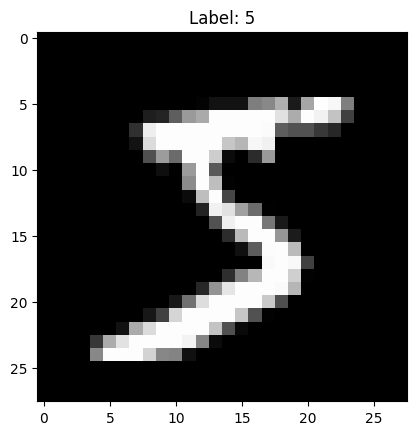

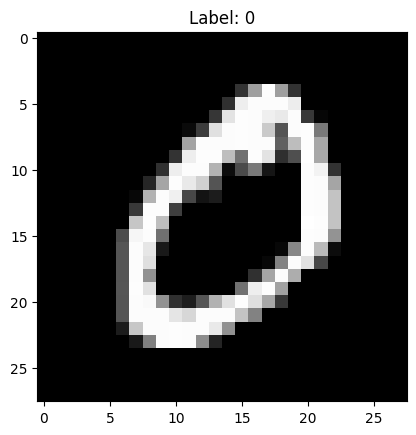

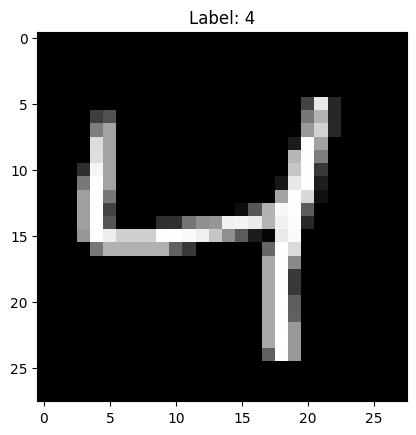

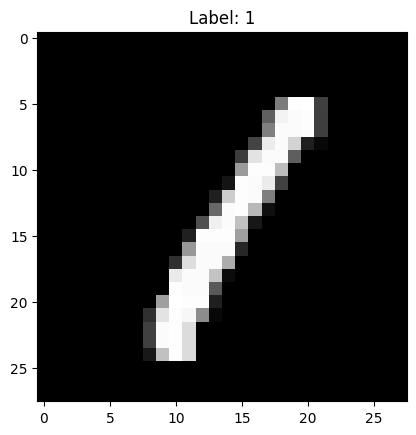

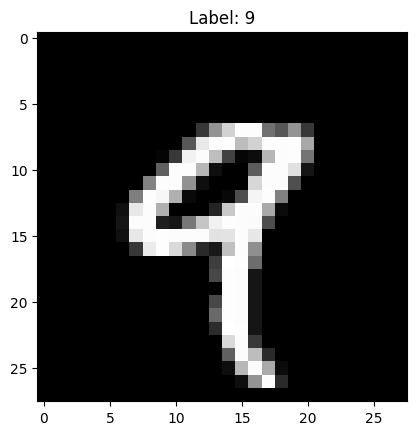

In [29]:
for i in range(5):
    image = mnist.data.iloc[i].values.reshape(28, 28)  
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {mnist.target.iloc[i]}")
    plt.show()

# 9. Select only 30,000 samples from this dataset to develop the model

In [30]:
mnist_subset = mnist_df.sample(n=30000, random_state=42)  

X_mnist_subset = mnist_subset.drop(columns=['target'])  
y_mnist_subset = mnist_subset['target']

# 10. Print the shape of the dataset

In [31]:
print(f"Shape of the dataset: {X_mnist_subset.shape}")

Shape of the dataset: (30000, 784)


# 11.1 Find out the number of samples for each class

In [32]:
class_counts = y_mnist_subset.value_counts()
print(class_counts)

target
1    3381
7    3185
9    3029
3    3029
2    3004
6    2975
0    2967
8    2887
4    2844
5    2699
Name: count, dtype: int64


# 11.2 Split the data into training and test

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_mnist_subset, y_mnist_subset, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (24000, 784)
Test set size: (6000, 784)


# 12. Apply svm model for linear and print out training and test accuracy

In [34]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

train_accuracy_svm_linear = accuracy_score(y_train, svm_linear.predict(X_train))
test_accuracy_svm_linear = accuracy_score(y_test, svm_linear.predict(X_test))

print(f"Training accuracy (SVM with Linear kernel): {train_accuracy_svm_linear}")
print(f"Test accuracy (SVM with Linear kernel): {test_accuracy_svm_linear}")

Training accuracy (SVM with Linear kernel): 1.0
Test accuracy (SVM with Linear kernel): 0.9095


# 13. Apply svm mod for rbf and print out training and test accuracy

In [35]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

train_accuracy_svm_rbf = accuracy_score(y_train, svm_rbf.predict(X_train))
test_accuracy_svm_rbf = accuracy_score(y_test, svm_rbf.predict(X_test))

print(f"Training accuracy (SVM with RBF kernel): {train_accuracy_svm_rbf}")
print(f"Test accuracy (SVM with RBF kernel): {test_accuracy_svm_rbf}")

Training accuracy (SVM with RBF kernel): 0.9883333333333333
Test accuracy (SVM with RBF kernel): 0.9691666666666666


# 14. Apply the decision tree model (depth = 10) and print out training and test accuracy

In [36]:
decision_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
decision_tree.fit(X_train, y_train)

train_accuracy_dt = accuracy_score(y_train, decision_tree.predict(X_train))
test_accuracy_dt = accuracy_score(y_test, decision_tree.predict(X_test))

print(f"Training accuracy (Decision Tree): {train_accuracy_dt}")
print(f"Test accuracy (Decision Tree): {test_accuracy_dt}")

Training accuracy (Decision Tree): 0.9123333333333333
Test accuracy (Decision Tree): 0.8421666666666666


# 15. Apply the knn (neighbor = 5) and print out training and test accuracy

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

train_accuracy_knn = accuracy_score(y_train, knn.predict(X_train))
test_accuracy_knn = accuracy_score(y_test, knn.predict(X_test))

print(f"Training accuracy (KNN): {train_accuracy_knn}")
print(f"Test accuracy (KNN): {test_accuracy_knn}")

Training accuracy (KNN): 0.9742083333333333
Test accuracy (KNN): 0.9605


# 16. Apply the random forest model (estimators value = 100) and print out training and test accuracy

In [38]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

train_accuracy_rf = accuracy_score(y_train, random_forest.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, random_forest.predict(X_test))

print(f"Training accuracy (Random Forest): {train_accuracy_rf}")
print(f"Test accuracy (Random Forest): {test_accuracy_rf}")

Training accuracy (Random Forest): 1.0
Test accuracy (Random Forest): 0.9595


# 17. Print out all the models' training accuracy

In [39]:
print("Training Accuracies:")
print(f"SVM (Linear Kernel): {train_accuracy_svm_linear}")
print(f"SVM (RBF Kernel): {train_accuracy_svm_rbf}")
print(f"Decision Tree: {train_accuracy_dt}")
print(f"KNN: {train_accuracy_knn}")
print(f"Random Forest: {train_accuracy_rf}")


Training Accuracies:
SVM (Linear Kernel): 1.0
SVM (RBF Kernel): 0.9883333333333333
Decision Tree: 0.9123333333333333
KNN: 0.9742083333333333
Random Forest: 1.0


# 18. Create a bar plot

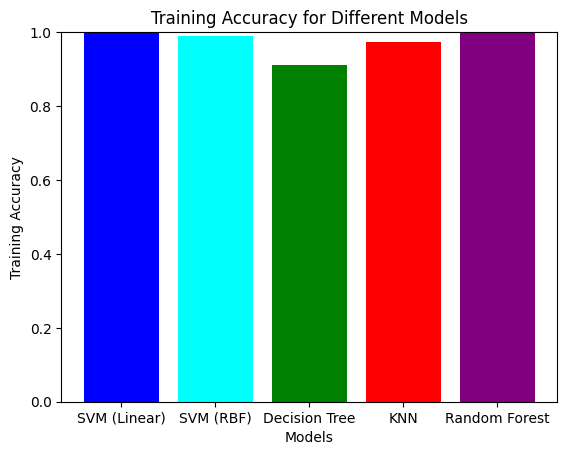

In [40]:
model_names = ['SVM (Linear)', 'SVM (RBF)', 'Decision Tree', 'KNN', 'Random Forest']
training_accuracies = [train_accuracy_svm_linear, train_accuracy_svm_rbf, train_accuracy_dt, train_accuracy_knn, train_accuracy_rf]

plt.bar(model_names, training_accuracies, color=['blue', 'cyan', 'green', 'red', 'purple'])
plt.title('Training Accuracy for Different Models')
plt.xlabel('Models')
plt.ylabel('Training Accuracy')
plt.ylim([0, 1]) 
plt.show()

# 19. Print out all the models' test accuracy

In [41]:
print("Test Accuracies:")
print(f"SVM (Linear Kernel): {test_accuracy_svm_linear}")
print(f"SVM (RBF Kernel): {test_accuracy_svm_rbf}")
print(f"Decision Tree: {test_accuracy_dt}")
print(f"KNN: {test_accuracy_knn}")
print(f"Random Forest: {test_accuracy_rf}")

Test Accuracies:
SVM (Linear Kernel): 0.9095
SVM (RBF Kernel): 0.9691666666666666
Decision Tree: 0.8421666666666666
KNN: 0.9605
Random Forest: 0.9595


# 20. Create a bar plot

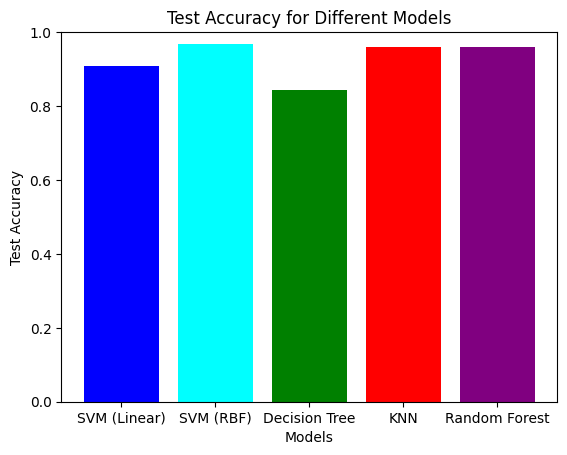

In [42]:
test_accuracies = [test_accuracy_svm_linear, test_accuracy_svm_rbf, test_accuracy_dt, test_accuracy_knn, test_accuracy_rf]

plt.bar(model_names, test_accuracies, color=['blue', 'cyan', 'green', 'red', 'purple'])
plt.title('Test Accuracy for Different Models')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.ylim([0, 1])
plt.show()

# 21. Explanation

I would personally select the SVM(rbf) model as it has the highest accuracy as shown above in the bar graph. 
The difference between applying linear kernel and non-linear kernel is that a linear kernel should be used if the data is linearly seperaable.
A non-linear kernel should be used if the data is non-linearly seperable.
Individual decision trees are usually less accurate than random forests. This is because a random forest is a combination of decision trees and averages the predictions of multiple trees.